## Scaling for solo dungeons
Dungeons scale quadratically in difficulty when everything is single target, but less so with multi-target.
Here we want to look at various ways to add scaling to solo (or unfilled) dungeons that still gives a slight
advantage to grouping. Note that the ability scaling solution here is meant to be simple to implement, whereas
the "clone" method would be a more ideal solution. Things that could be adjusted are:
1. Accuracy  
An additional accuracy modifier (similar to how abilities work) could be added to monsters to make them hit
less often against fewer players.
2. Attack Speed  
Monster attack speed could be reduced as the number of players increase; however, this would mess up their
ability rotations unless cooldown was also adjusted.
3. Health  
Monster health could be proportional to player count, but this breaks the action economy of a dungeon,
so should not be done.
4. Damage  
Monster damage can be reduced proportional to player count, but since much of the current balance of a dungeon
is based around maxhit, this should not be touched.

The only good one of the four options is accuracy.

### Additional considerations
- AoE attacks make choosing the scaling pretty difficult.
- Total food used would come down, not incredibly important but noticeable
- High susceptibility to random one-shots ( If mantle of flames ability was 100% chance to activate but with
  something like a 5 minute cooldown, this would help a lot! )
- The scaling parameter could be set per-dungeon instead of just a global number if that
  would work better. Testing on dev in various gear setups should be done to find a good scaling
  choice since it is pretty arbitrary.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark-palette")

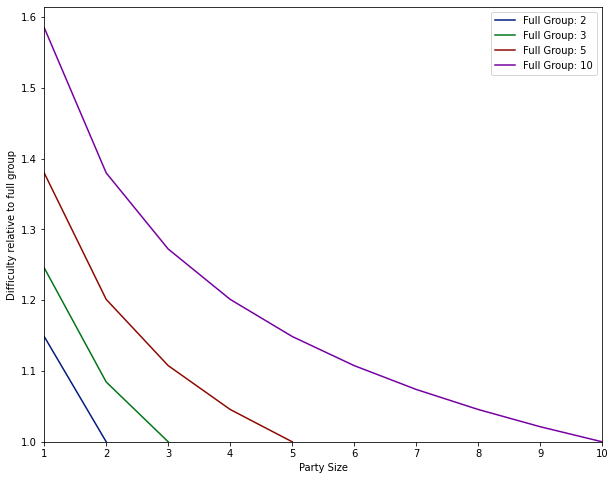

In [2]:
# Solution 1: Simple accuracy and speed scaling
# Pros: Very simple to implement
# Cons: Food and AoE attacks have a fudge factor
scaling_choice = 0.90*2
def plotScalingVSNormal(scale, **kwargs):
    # Keeps
    base = kwargs.get("base", 5)
    party = np.arange(1,base+1,1)
    accMod = (party / base)**scale
    spdMod = 1
    monsterDPS = accMod * spdMod * base**2
    # What about AoE, one-shots, etc?
    plt.plot(party, monsterDPS/party**2, label=f'Full Group: {base}')
fig = plt.figure(figsize=(10,8))
plotScalingVSNormal(scaling_choice, base=2)
plotScalingVSNormal(scaling_choice, base=3)
plotScalingVSNormal(scaling_choice, base=5)
plotScalingVSNormal(scaling_choice, base=10)
plt.ylabel("Difficulty relative to full group")
plt.xlabel("Party Size")
plt.xlim(1, 10)
plt.ylim(bottom=1)
plt.legend()
plt.show()